In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime

In [2]:
data = pd.read_csv('trip data simba.csv')
data['dtime'] = pd.to_datetime(data['dtime'])
# data = data[data['dtime'].dt.date < datetime(2023,3,25).date()]
data = data.set_index('dtime')
data.head(12)

,asset_id,asset_name,trip_count,amt,stops
dtime,,,,,
2022-10-19,473,7 Star,30,18021,362
2022-10-20,473,7 Star,28,4834,375
2022-10-21,473,7 Star,20,8298,378
2022-10-22,473,7 Star,25,11199,349
2022-10-23,473,7 Star,10,7723,200
2022-10-24,473,7 Star,9,13201,168
2022-10-25,473,7 Star,20,6292,359
2022-10-26,473,7 Star,8,16876,145
2022-10-27,473,7 Star,25,9753,414


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 179 entries, 2022-10-19 to 2023-04-17
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   asset_id    179 non-null    int64 
 1   asset_name  179 non-null    object
 2   trip_count  179 non-null    int64 
 3   amt         179 non-null    int64 
 4   stops       179 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 8.4+ KB


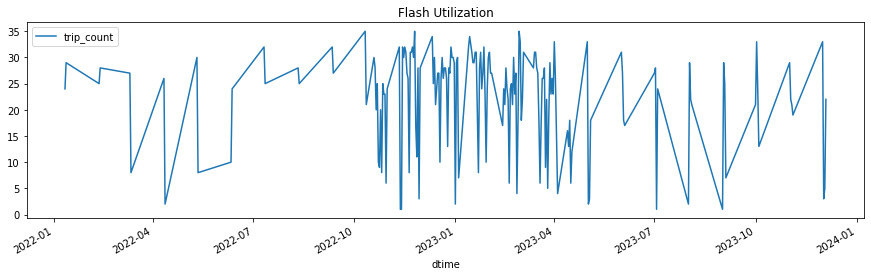

In [5]:
# data['dtime'] = pd.to_datetime(data['dtime'])
data[['trip_count']].plot(figsize=(15, 4))
plt.legend(loc='best')
plt.title('Flash Utilization')
plt.show(block=False)

<AxesSubplot:xlabel='dtime', ylabel='trip_count'>

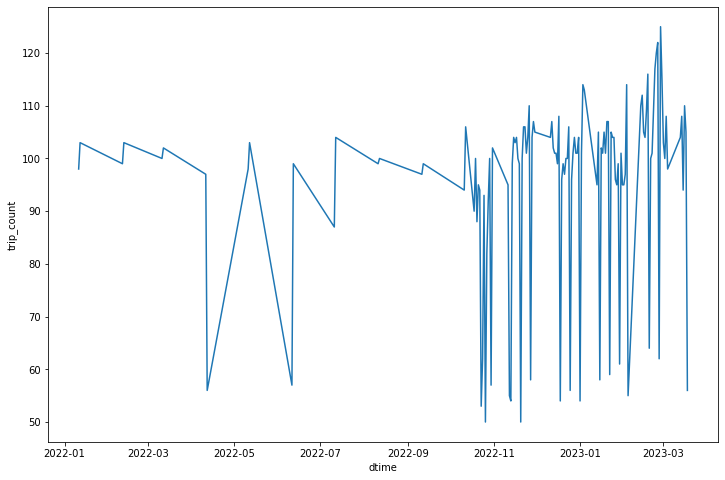

In [26]:
sns.lineplot(data=data, x='dtime', y='trip_count')

In [27]:
data.index

DatetimeIndex(['2022-10-18', '2022-10-19', '2022-10-20', '2022-10-21',
               '2022-10-22', '2022-10-23', '2022-10-24', '2022-10-25',
               '2022-10-26', '2022-10-27',
               ...
               '2023-03-03', '2023-03-13', '2023-03-14', '2023-03-15',
               '2023-03-16', '2023-03-17', '2023-03-18', '2023-01-04',
               '2023-02-04', '2023-03-04'],
              dtype='datetime64[ns]', name='dtime', length=128, freq=None)

<AxesSubplot:xlabel='dtime', ylabel='trip_count'>

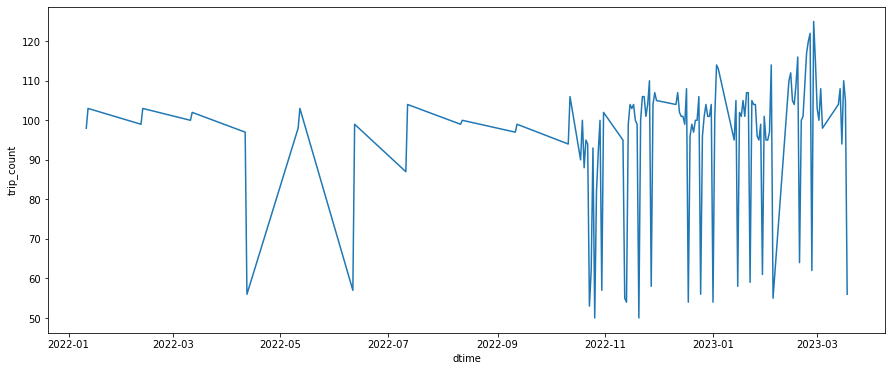

In [28]:
plt.figure(figsize=(15,6))
sns.lineplot(x='dtime', y='trip_count', data=data)

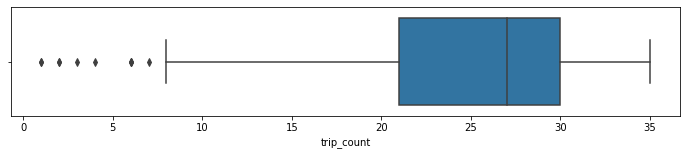

In [6]:
import seaborn as sns
fig = plt.subplots(figsize=(12, 2))
ax = sns.boxplot(x=data['trip_count'],whis=1.5)

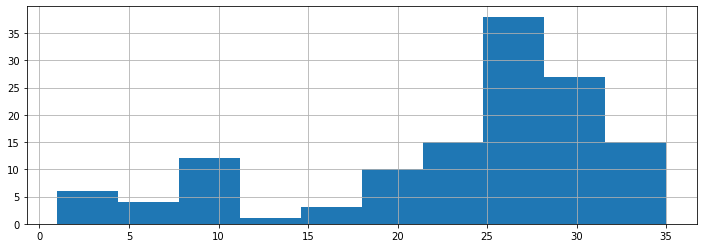

In [7]:
fig = data['trip_count'].hist(figsize = (12,4))

In [8]:
data = data[['trip_count']]
data

,trip_count
dtime,
2022-10-19,30
2022-10-20,28
2022-10-21,20
2022-10-22,25
2022-10-23,10
...,...
2023-03-22,26
2023-03-23,28
2023-03-24,9


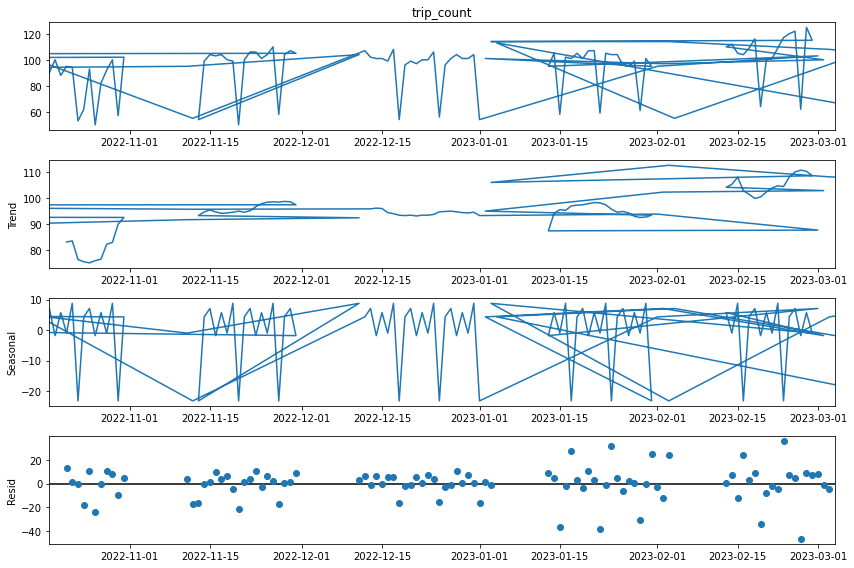

In [29]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 12, 8
decomposition = sm.tsa.seasonal_decompose(data.trip_count, model='additive', period=7) # additive seasonal index
fig = decomposition.plot()
plt.show()

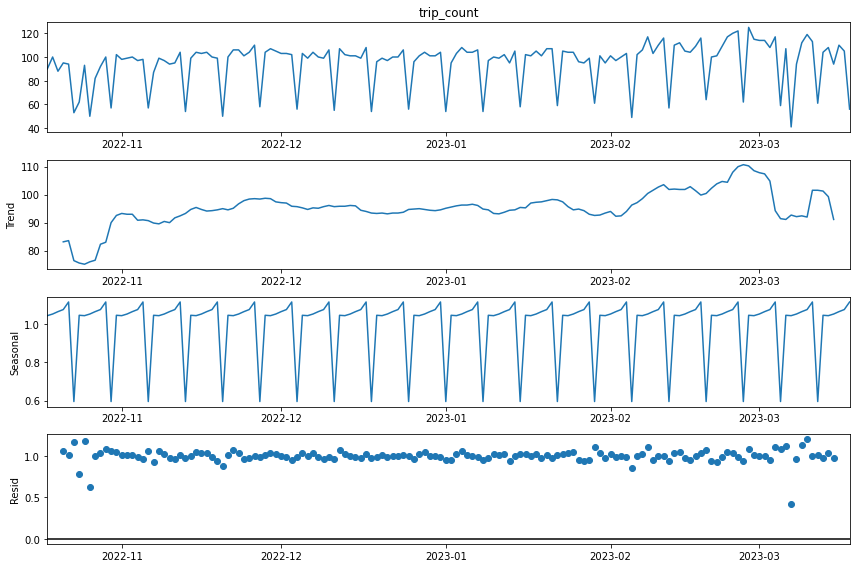

In [43]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 12, 8
decomposition = sm.tsa.seasonal_decompose(data.trip_count, model='multiplicative', period=7) # multiplicative seasonal index
fig = decomposition.plot()
plt.show()

In [44]:
#Train Test Split
train_len = 120
train = data[0:train_len] # first 120 months as training set
test = data[train_len:] # last 24 months as out-of-time test set

In [45]:
#Naive Method
y_hat_naive = test.copy()
y_hat_naive['naive_forecast'] = train['trip_count'][train_len-1]

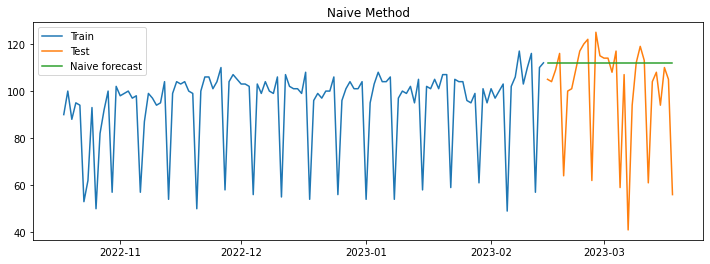

In [46]:
plt.figure(figsize=(12,4))
plt.plot(train['trip_count'], label='Train')
plt.plot(test['trip_count'], label='Test')
plt.plot(y_hat_naive['naive_forecast'], label='Naive forecast')
plt.legend(loc='best')
plt.title('Naive Method')
plt.show()

In [47]:
## RMSE MAPE
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['trip_count'], y_hat_naive['naive_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['trip_count']-y_hat_naive['naive_forecast'])/test['trip_count'])*100,2)

results = pd.DataFrame({'Method':['Naive method'], 'MAPE': [mape], 'RMSE': [rmse]})
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,25.05,23.8


In [48]:
#Simple Average
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['trip_count'].mean()

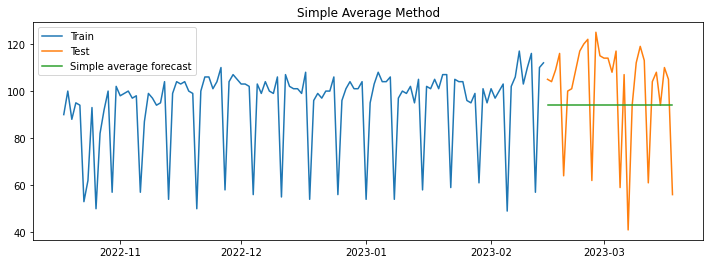

In [49]:
plt.figure(figsize=(12,4))
plt.plot(train['trip_count'], label='Train')
plt.plot(test['trip_count'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Simple average forecast')
plt.legend(loc='best')
plt.title('Simple Average Method')
plt.show()

In [50]:
rmse = np.sqrt(mean_squared_error(test['trip_count'], y_hat_avg['avg_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['trip_count']-y_hat_avg['avg_forecast'])/test['trip_count'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple average method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,25.05,23.80
0,Simple average method,22.94,24.33


In [51]:
#Moving Average
y_hat_sma = data.copy()
ma_window = 7
y_hat_sma['sma_forecast'] = data['trip_count'].rolling(ma_window).mean()
y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len-1]

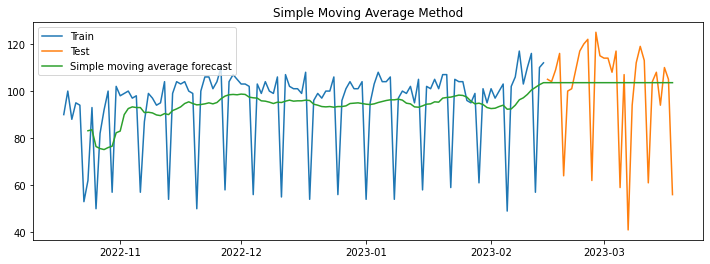

In [52]:
plt.figure(figsize=(12,4))
plt.plot(train['trip_count'], label='Train')
plt.plot(test['trip_count'], label='Test')
plt.plot(y_hat_sma['sma_forecast'], label='Simple moving average forecast')
plt.legend(loc='best')
plt.title('Simple Moving Average Method')
plt.show()

In [53]:
rmse = np.sqrt(mean_squared_error(test['trip_count'], y_hat_sma['sma_forecast'][train_len:])).round(2)
mape = np.round(np.mean(np.abs(test['trip_count']-y_hat_sma['sma_forecast'][train_len:])/test['trip_count'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple moving average forecast'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,25.05,23.80
0,Simple average method,22.94,24.33
0,Simple moving average forecast,22.33,22.05


In [54]:
#Expontial Smoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
model = SimpleExpSmoothing(train['trip_count'])
model_fit = model.fit(smoothing_level=0.2,optimized=True)
model_fit.params
y_hat_ses = test.copy()
y_hat_ses['ses_forecast'] = model_fit.forecast(32)

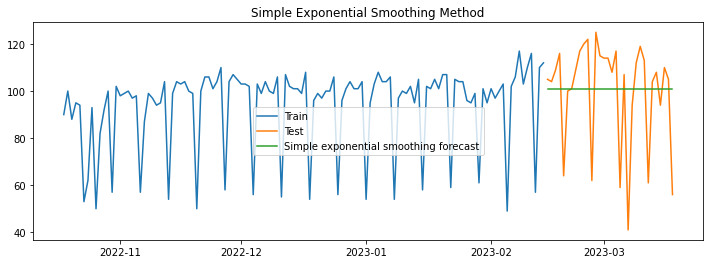

In [55]:
plt.figure(figsize=(12,4))
plt.plot(train['trip_count'], label='Train')
plt.plot(test['trip_count'], label='Test')
plt.plot(y_hat_ses['ses_forecast'], label='Simple exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Simple Exponential Smoothing Method')
plt.show()

In [56]:
# rmse = np.sqrt(mean_squared_error(test['trip_count'], y_hat_ses['ses_forecast'])).round(2)
# mape = np.round(np.mean(np.abs(test['trip_count']-y_hat_ses['ses_forecast'])/test['trip_count'])*100,2)

# tempResults = pd.DataFrame({'Method':['Simple exponential smoothing forecast'], 'RMSE': [rmse],'MAPE': [mape] })
# results = pd.concat([results, tempResults])
# results

In [57]:
#Holts Method
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(np.asarray(train['trip_count']) ,seasonal_periods=7 ,trend='multiplicative', seasonal=None)
model_fit = model.fit(smoothing_level=0.15, smoothing_slope=0.03, optimized=False)
print(model_fit.params)
y_hat_holt = test.copy()
y_hat_holt['holt_forecast'] = model_fit.forecast(len(test))

{'smoothing_level': 0.15, 'smoothing_trend': 0.03, 'smoothing_seasonal': None, 'damping_trend': nan, 'initial_level': 98.59999999999994, 'initial_trend': 0.9669924396090726, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


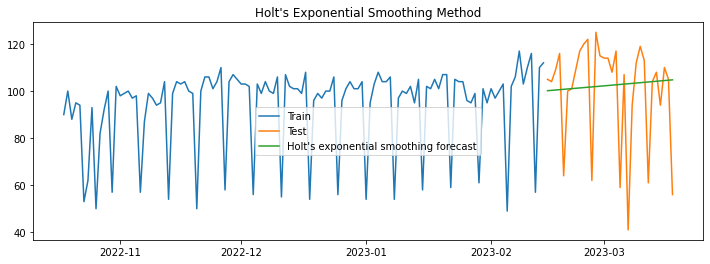

In [58]:
plt.figure(figsize=(12,4))
plt.plot( train['trip_count'], label='Train')
plt.plot(test['trip_count'], label='Test')
plt.plot(y_hat_holt['holt_forecast'], label='Holt\'s exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Holt\'s Exponential Smoothing Method')
plt.show()

In [59]:
rmse = np.sqrt(mean_squared_error(test['trip_count'], y_hat_holt['holt_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['trip_count']-y_hat_holt['holt_forecast'])/test['trip_count'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt\'s exponential smoothing method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,25.05,23.80
0,Simple average method,22.94,24.33
0,Simple moving average forecast,22.33,22.05
0,Holt's exponential smoothing method,22.50,22.42


In [60]:
# # Holt Winters's additive forecast
# y_hat_hwa = test.copy()
# model = ExponentialSmoothing(np.asarray(train['trip_count']) ,seasonal_periods=7 ,trend='add', seasonal='add')
# model_fit = model.fit(optimized=True)
# print(model_fit.params)
# y_hat_hwa['hw_forecast'] = model_fit.forecast(32)

In [61]:
# plt.figure(figsize=(12,4))
# plt.plot( train['trip_count'], label='Train')
# plt.plot(test['trip_count'], label='Test')
# plt.plot(y_hat_hwa['hw_forecast'], label='Holt Winters\'s additive forecast')
# plt.legend(loc='best')
# plt.title('Holt Winters\' Additive Method')
# plt.show()

In [62]:
# rmse = np.sqrt(mean_squared_error(test['trip_count'], y_hat_hwa['hw_forecast'])).round(2)
# mape = np.round(np.mean(np.abs(test['trip_count']-y_hat_hwa['hw_forecast'])/test['trip_count'])*100,2)

# tempResults = pd.DataFrame({'Method':['Holt Winters\' additive method'], 'RMSE': [rmse],'MAPE': [mape] })
# results = pd.concat([results, tempResults])
# results = results[['Method', 'RMSE', 'MAPE']]
# results

In [63]:
# # Holt Winters's mulitplicative forecast
# y_hat_hwm = test.copy()
# model = ExponentialSmoothing(np.asarray(train['trip_count']) ,seasonal_periods=7 ,trend='add', seasonal='mul')
# model_fit = model.fit(optimized=True)
# print(model_fit.params)
# y_hat_hwm['hw_forecast'] = model_fit.forecast(32)

In [64]:
# plt.figure(figsize=(12,4))
# plt.plot( train['trip_count'], label='Train')
# plt.plot(test['trip_count'], label='Test')
# plt.plot(y_hat_hwm['hw_forecast'], label='Holt Winters\'s mulitplicative forecast')
# plt.legend(loc='best')
# plt.title('Holt Winters\' Mulitplicative Method')
# plt.show()

In [65]:
# rmse = np.sqrt(mean_squared_error(test['trip_count'], y_hat_hwm['hw_forecast'])).round(2)
# mape = np.round(np.mean(np.abs(test['trip_count']-y_hat_hwm['hw_forecast'])/test['trip_count'])*100,2)

# tempResults = pd.DataFrame({'Method':['Holt Winters\' multiplicative method'], 'RMSE': [rmse],'MAPE': [mape] })
# results = pd.concat([results, tempResults])
# results = results[['Method', 'RMSE', 'MAPE']]
# results

In [66]:
# #Stationary Test
# data['trip_count'].plot(figsize=(12, 4))
# plt.legend(loc='best')
# plt.title('Logistic Trips')
# plt.show(block=False)

In [67]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(data['trip_count'])

print('ADF Statistic: %f' % adf_test[0])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' % adf_test[1])

ADF Statistic: -2.510863
Critical Values @ 0.05: -2.88
p-value: 0.112854


In [68]:
from statsmodels.tsa.stattools import kpss
kpss_test = kpss(data['trip_count'])

print('KPSS Statistic: %f' % kpss_test[0])
print('Critical Values @ 0.05: %.2f' % kpss_test[3]['5%'])
print('p-value: %f' % kpss_test[1])

KPSS Statistic: 0.638740
Critical Values @ 0.05: 0.46
p-value: 0.019115


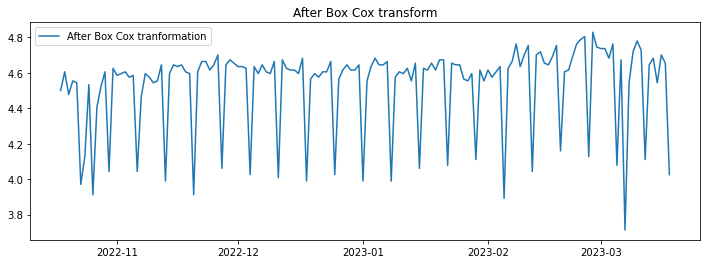

In [69]:
#Boxcox transformation
from scipy.stats import boxcox
data_boxcox = pd.Series(boxcox(data['trip_count'], lmbda=0), index = data.index)

plt.figure(figsize=(12,4))
plt.plot(data_boxcox, label='After Box Cox tranformation')
plt.legend(loc='best')
plt.title('After Box Cox transform')
plt.show()

In [70]:
data_boxcox

dtime
2022-10-18    4.499810
2022-10-19    4.605170
2022-10-20    4.477337
2022-10-21    4.553877
2022-10-22    4.543295
                ...   
2023-03-14    4.682131
2023-03-15    4.543295
2023-03-16    4.700480
2023-03-17    4.653960
2023-03-18    4.025352
Length: 152, dtype: float64

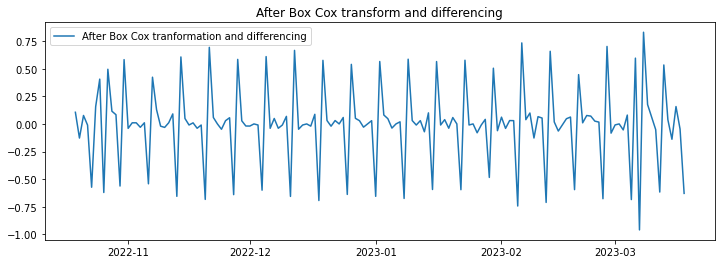

In [71]:
#Differencing
data_boxcox_diff = pd.Series(data_boxcox - data_boxcox.shift(), data.index)
plt.figure(figsize=(12,4))
plt.plot(data_boxcox_diff, label='After Box Cox tranformation and differencing')
plt.legend(loc='best')
plt.title('After Box Cox transform and differencing')
plt.show()

In [72]:
data_boxcox_diff.dropna(inplace=True)

In [73]:
#ADF Test
adf_test = adfuller(data_boxcox_diff)

print('ADF Statistic: %f' % adf_test[0])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' % adf_test[1])

ADF Statistic: -4.448805
Critical Values @ 0.05: -2.88
p-value: 0.000243


In [74]:
kpss_test = kpss(data_boxcox_diff)

print('KPSS Statistic: %f' % kpss_test[0])
print('Critical Values @ 0.05: %.2f' % kpss_test[3]['5%'])
print('p-value: %f' % kpss_test[1])

KPSS Statistic: 0.252244
Critical Values @ 0.05: 0.46
p-value: 0.100000


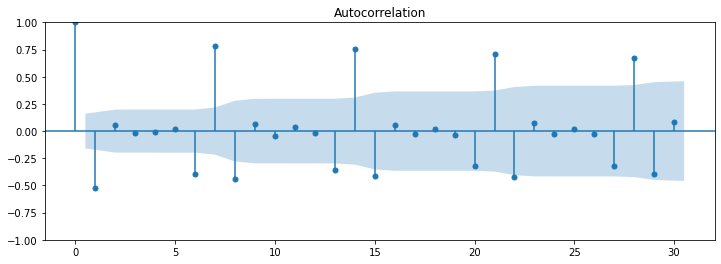

In [75]:
#Auto Correlation Function (ACF)
from statsmodels.graphics.tsaplots import plot_acf
plt.figure(figsize=(12,4))
plot_acf(data_boxcox_diff, ax=plt.gca(), lags = 30)
plt.show()

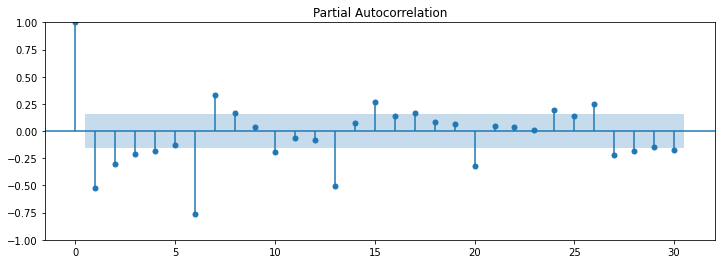

In [76]:
from statsmodels.graphics.tsaplots import plot_pacf
plt.figure(figsize=(12,4))
plot_pacf(data_boxcox_diff, ax=plt.gca(), lags = 30)
plt.show()

In [77]:
train_data_boxcox = data_boxcox[:train_len]
test_data_boxcox = data_boxcox[train_len:]
train_data_boxcox_diff = data_boxcox_diff[:train_len-1]
test_data_boxcox_diff = data_boxcox_diff[train_len-1:]

In [78]:
train_data_boxcox_diff

dtime
2022-10-19    0.105361
2022-10-20   -0.127833
2022-10-21    0.076540
2022-10-22   -0.010582
2022-10-23   -0.573003
                ...   
2023-02-10    0.065751
2023-02-11    0.053110
2023-02-12   -0.710539
2023-02-13    0.657429
2023-02-14    0.018019
Length: 119, dtype: float64

In [79]:
#ARMA
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train_data_boxcox_diff, order=(2, 1, 1))
model_fit = model.fit()
print(model_fit.params)

ar.L1    -0.685360
ar.L2    -0.351261
ma.L1    -0.999632
sigma2    0.073959
dtype: float64


In [80]:
y_hat_arma = data_boxcox_diff.copy()
y_hat_arma['arma_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox_diff'].cumsum()
y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox'].add(data_boxcox[0])
y_hat_arma['arma_forecast'] = np.exp(y_hat_arma['arma_forecast_boxcox'])

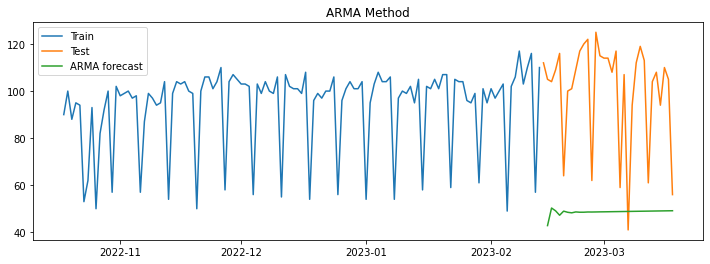

In [81]:
plt.figure(figsize=(12,4))
plt.plot( data['trip_count'][:train_len-1], label='Train')
plt.plot(data['trip_count'][train_len-1:], label='Test')
plt.plot(y_hat_arma['arma_forecast'][test.index.min():], label='ARMA forecast')
plt.legend(loc='best')
plt.title('ARMA Method')
plt.show()

In [82]:
rmse = np.sqrt(mean_squared_error(test['trip_count'], y_hat_arma['arma_forecast'][train_len-1:])).round(2)
mape = np.round(np.mean(np.abs(test['trip_count']-y_hat_arma['arma_forecast'][train_len-1:])/test['trip_count'])*100,2)

tempResults = pd.DataFrame({'Method':['Autoregressive moving average (ARMA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,25.05,23.80
0,Simple average method,22.94,24.33
0,Simple moving average forecast,22.33,22.05
0,Holt's exponential smoothing method,22.50,22.42
0,Autoregressive moving average (ARMA) method,56.12,48.76


In [83]:
#ARIMA
# model = ARIMA(train_data_boxcox, order=(1, 1, 1))
# model_fit = model.fit()
# print(model_fit.params)

In [84]:
# y_hat_arma = data_boxcox_diff.copy()
# y_hat_arma['arma_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
# y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox_diff'].cumsum()
# y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox'].add(data_boxcox[0])
# y_hat_arma['arma_forecast'] = np.exp(y_hat_arma['arma_forecast_boxcox'])

In [85]:
# plt.figure(figsize=(12,4))
# plt.plot( data['trip_count'][:train_len-1], label='Train')
# plt.plot(data['trip_count'][train_len-1:], label='Test')
# plt.plot(y_hat_arma['arma_forecast'][test.index.min():], label='ARMA forecast')
# plt.legend(loc='best')
# plt.title('ARMA Method')
# plt.show()

In [86]:
rmse = np.sqrt(mean_squared_error(test['trip_count'], y_hat_arma['arma_forecast'][train_len-1:])).round(2)
mape = np.round(np.mean(np.abs(test['trip_count']-y_hat_arma['arma_forecast'][train_len-1:])/test['trip_count'])*100,2)

tempResults = pd.DataFrame({'Method':['Autoregressive moving average (ARMA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,25.05,23.80
0,Simple average method,22.94,24.33
0,Simple moving average forecast,22.33,22.05
0,Holt's exponential smoothing method,22.50,22.42
0,Autoregressive moving average (ARMA) method,56.12,48.76
0,Autoregressive moving average (ARMA) method,56.12,48.76


In [87]:
#SARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train_data_boxcox, order=(1, 1, 1), seasonal_order=(1, 1, 1, 7)) 
model_fit = model.fit()
print(model_fit.params)

ar.L1     -0.547804
ma.L1     -0.097222
ar.S.L7   -0.201110
ma.S.L7   -0.776085
sigma2     0.007348
dtype: float64


In [99]:
y_hat_sarima = data_boxcox_diff.copy()
y_hat_sarima['sarima_forecast_boxcox'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_sarima['sarima_forecast'] = np.exp(y_hat_sarima['sarima_forecast_boxcox'])

In [101]:
y_hat_sarima['sarima_forecast']

2022-10-19     89.999997
2022-10-20    100.000002
2022-10-21     87.999999
2022-10-22     95.000001
2022-10-23     93.999999
                 ...    
2023-03-14    119.476520
2023-03-15    123.122683
2023-03-16    117.765000
2023-03-17    119.669877
2023-03-18    124.786045
Freq: D, Name: predicted_mean, Length: 151, dtype: float64

In [94]:
y_hat_sarima.to_csv('predicted.csv')

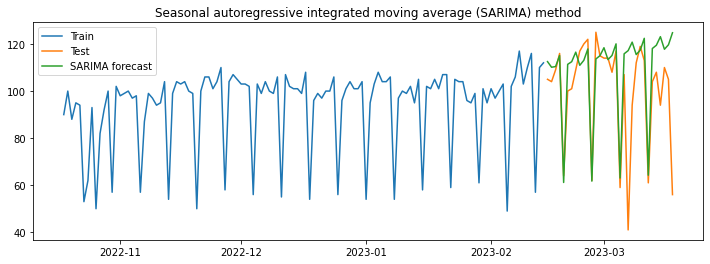

In [90]:
plt.figure(figsize=(12,4))
plt.plot(train['trip_count'], label='Train')
plt.plot(test['trip_count'], label='Test')
plt.plot(y_hat_sarima['sarima_forecast'][test.index.min():], label='SARIMA forecast')
plt.legend(loc='best')
plt.title('Seasonal autoregressive integrated moving average (SARIMA) method')
plt.show()

In [91]:
rmse = np.sqrt(mean_squared_error(test['trip_count'], y_hat_sarima['sarima_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['trip_count']-y_hat_sarima['sarima_forecast'][test.index.min():])/test['trip_count'])*100,2)

tempResults = pd.DataFrame({'Method':['Seasonal autoregressive integrated moving average (SARIMA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,25.05,23.80
0,Simple average method,22.94,24.33
0,Simple moving average forecast,22.33,22.05
0,Holt's exponential smoothing method,22.50,22.42
0,Autoregressive moving average (ARMA) method,56.12,48.76
0,Autoregressive moving average (ARMA) method,56.12,48.76
0,Seasonal autoregressive integrated moving aver...,20.65,16.67


In [98]:
y_hat_sarima['sarima_forecast'][test.index.min():].to_csv('predicted.csv')

In [ ]:
y_hat_sarima['sarima_forecast']